In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame

In [2]:
conn = sqlite3.connect('taxi_db_s.db')
c = conn.cursor()
c.execute("select substr(PU_Date,7,4)||'-'||substr(PU_Date,1,2)||'-'||substr(PU_Date,4,2)||' '||PU_hour||':'||PU_minute from Date_time")

df= DataFrame(c.fetchall())


In [3]:
df['pickup_day']=pd.to_datetime(df[0],format='%Y-%m-%d %H:%M:%S').dt.day
df['pickup_month']=pd.to_datetime(df[0],format='%Y-%m-%d %H:%M:%S').dt.month
df['pickup_year']=pd.to_datetime(df[0],format='%Y-%m-%d %H:%M:%S').dt.year
df['pickup_weekday'] = pd.DatetimeIndex(df[0]).dayofweek
df['pickup_hour']=pd.to_datetime(df[0],format='%Y-%m-%d %H:%M:%S').dt.hour
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)

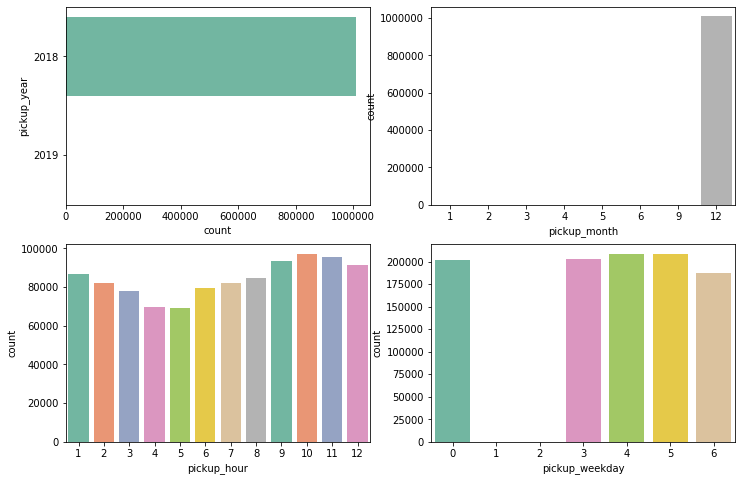

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df,palette='Set2')
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set2')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(x='pickup_weekday', data=df,palette='Set2')
plt.savefig('Insight #5')
plt.show()


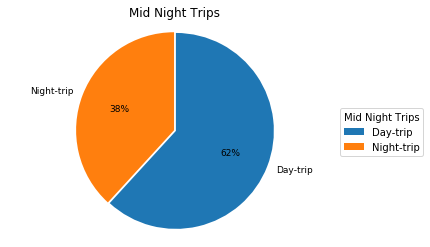

Wall time: 174 ms


In [7]:
%%time
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
explode = (0.01, 0.01)
trips = ['Day-trip','Night-trip']
count = df['mid_night_trip'].value_counts()
plt.pie(count,labels=trips,autopct='%1.0f%%',explode=explode,textprops={'fontsize': 9}, counterclock=False,startangle=90)
plt.axis('equal')
plt.legend(trips,title='Mid Night Trips', bbox_to_anchor=(1.1,0.5),loc='right', bbox_transform=plt.gcf().transFigure)
plt.title("Mid Night Trips")
plt.savefig('Insight #5_1')
plt.show()